# Visualization with [Matplotlib](https://matplotlib.org/)

-------------------------------

 [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook) by Jake VanderPlas

Matplotlib is a multi-platform data visualization library
* a well-tested, cross-platform graphics engine
* built on NumPy arrays
* designed to work with the broader [SciPy](https://www.scipy.org/) stack

It was conceived by John Hunter in 2002, with version 0.1 released in 2003.
It was adopted as the plotting package of choice of the Space Telescope Science Institute (the folks behind the Hubble Telescope), which financially supported Matplotlib’s development and greatly expanded its capabilities.

Recent Matplotlib versions make it relatively easy to set new global plotting styles, and people have been developing new packages that build on its powerful internals to drive Matplotlib via cleaner, more modern APIs—for example, Seaborn, [ggpy](http://yhat.github.io/ggpy/), [HoloViews](http://holoviews.org/), [Altair](http://altair-viz.github.io/), and even Pandas itself can be used as wrappers around Matplotlib's API.

## 1. General Matplotlib Tips
-----------

#### 1.1. Plotting from an IPython notebook
----------------

The IPython notebook is a browser-based interactive data analysis tool that can combine narrative, code, graphics, HTML elements, and much more into a single executable document.

Plotting interactively within an IPython notebook can be done with the ``%matplotlib`` command:

* ```ipython 
%matplotlib notebook
``` 
will lead to *interactive* plots embedded within the notebook

* ```ipython
%matplotlib inline
``` 
will lead to *static* images of your plot embedded in the notebook

* ```ipython
%matplotlib widget
```
will lead to *interactive* plots with widgets

In [1]:
#%matplotlib inline
%matplotlib widget

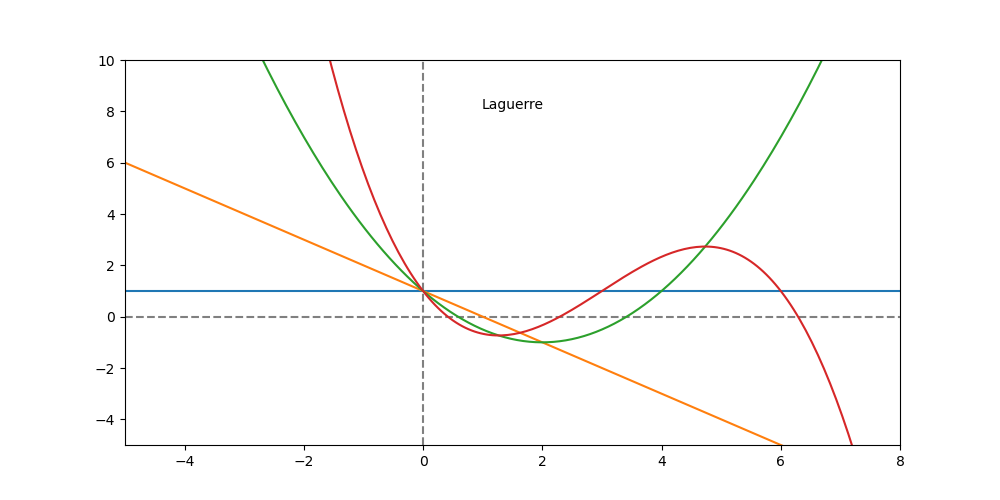

In [2]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
ax = fig.gca()

x = np.linspace(-5, 8, 256)
lg0 = np.polyval(scipy.special.laguerre(0),x)
lg1 = np.polyval(scipy.special.laguerre(1),x)
lg2 = np.polyval(scipy.special.laguerre(2),x)
lg3 = np.polyval(scipy.special.laguerre(3),x)

ax.plot(x,lg0, x,lg1, x,lg2, x,lg3)
ax.axhline(color="grey", ls="--", zorder=-1)
ax.axvline(color="grey", ls="--", zorder=-1)
ax.set_xlim(-5,8)
ax.set_ylim(-5,10)
ax.text(0.5, 0.9,'Laguerre', ha='center', va='top',transform = ax.transAxes)

plt.show()

In [4]:
plt.close()

#### 1.2. Importing Matplotlib
----------------

In [5]:
import matplotlib.pyplot as plt

In [6]:
type(plt)

module

#### 1.3. Setting Styles
-------------

 ``plt.style`` to choose appropriate aesthetic styles for figures

In [7]:
plt.style.use('classic')

In [8]:
plt.style.available[:]

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

#### 1.4. Figure
--------------

* *figure* can be thought of as a **single container** that contains all the objects representing axes, graphics, text, and labels.
* *axes*  is a **bounding box** with ticks and labels, which will eventually contain the plot elements that make up visualization.

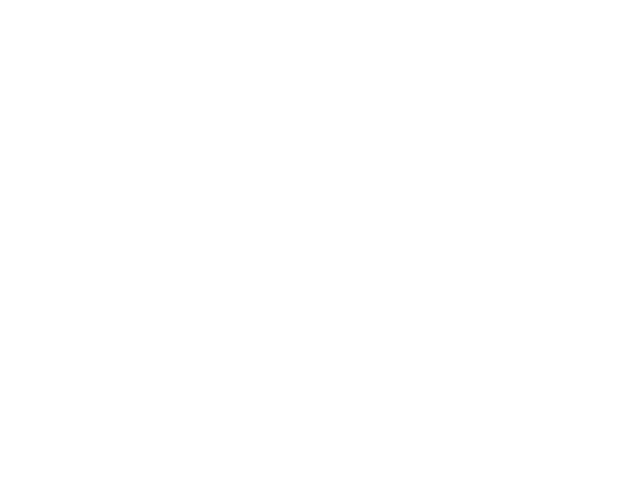

In [9]:
fig = plt.figure()

In [10]:
type(fig)

matplotlib.figure.Figure

In [11]:
dir(fig)

['_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_axes_internal',
 '_agg_filter',
 '_align_label_groups',
 '_alpha',
 '_animated',
 '_axobservers',
 '_axstack',
 '_button_pick_id',
 '_cachedRenderer',
 '_callbacks',
 '_canvas_callbacks',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_constrained',
 '_constrained_layout_pads',
 '_default_contains',
 '_dpi',
 '_gci',
 '_get_clipping_extent_bbox',
 '_get_dpi',
 '_get_draw_artists',
 '_gid',
 '_gridspecs',
 '_in_layout',
 '_label',
 '_localaxes',
 '_mouseover',
 '_normalize_grid_string',
 '_original_dpi',
 '_path_effects',
 '_picker',
 '_process_projection_r

In [12]:
plt.close('all')

#### 

#### 1.5. MATLAB-style Interface
-------------------

Matplotlib was originally written as a Python alternative for MATLAB users, and much of its syntax reflects that fact.
The MATLAB-style tools are contained in the `` pyplot`` interface.


In [3]:
import numpy as np
x = np.linspace(0, 10, 100)

In [4]:
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

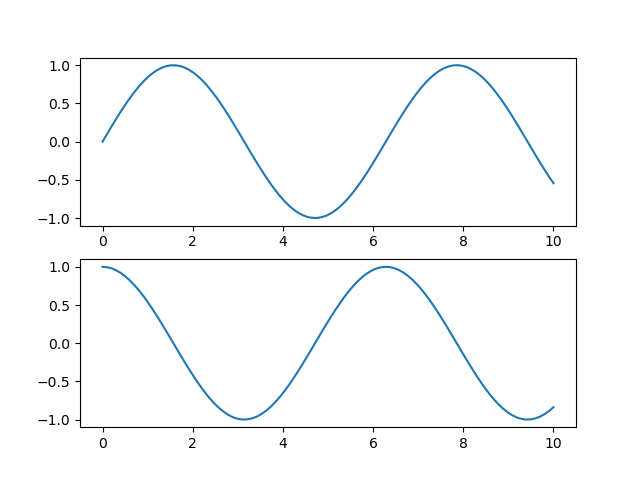

In [5]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

In [ ]:
plt.close('all')

It is important to note that this interface is *stateful*: it keeps track of the "current" figure and axes, which are where all ``plt`` commands are applied.
You can get a reference to these using the ``plt.gcf()`` (get current figure) and ``plt.gca()`` (get current axes) routines.

While this stateful interface **is fast and convenient** for simple plots, it is easy to run into problems.
For example, once the second panel is created, how can we go back and add something to the first?
This is possible within the MATLAB-style interface, but a bit clunky.
Fortunately, there is a better way.

#### 1.6. Object-oriented interface
-----------

The object-oriented interface is available for more complicated situations and gives more control over figure.
Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are *methods* of explicit ``Figure`` and ``Axes`` objects.

To re-create the previous plot using this style of plotting, you might do the following:

In [ ]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)
print(type(ax[0]))

In [ ]:
# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))

In [ ]:
ax[1].plot(x, np.cos(x));